In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('books.csv', error_bad_lines=False)
data.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [3]:
data.shape

(13714, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13714 non-null  int64  
 1   title               13714 non-null  object 
 2   authors             13714 non-null  object 
 3   average_rating      13714 non-null  float64
 4   isbn                13714 non-null  object 
 5   isbn13              13714 non-null  int64  
 6   language_code       13714 non-null  object 
 7   # num_pages         13714 non-null  int64  
 8   ratings_count       13714 non-null  int64  
 9   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [5]:
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [6]:
data = data.drop(columns=['isbn', 'isbn13'])
data.head()

,bookID,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964


In [7]:
def get_rating_percent(data):
    """
    Using Laplace's law of succession to return meaningful ratings based on average rating and ratings count
    """
    test = data['average_rating'] / 5 * data['ratings_count']
    result = (test + 1) / (data['ratings_count'] + 2) * 100
    return result

In [8]:
data['rating_percent'] = get_rating_percent(data)
data.head()

,bookID,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count,rating_percent
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249,91.199958
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613,89.799960
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390,89.399986
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272,88.187813
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964,90.999962


In [9]:
rating = data.sort_values('rating_percent', ascending=False)[['title', 'rating_percent']][:15]
rating

,title,rating_percent
7922,The Complete Calvin and Hobbes,96.397030
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,95.597654
7924,It's a Magical World (Calvin and Hobbes #11),95.196126
7925,The Indispensable Calvin and Hobbes,94.794272
7,Harry Potter Collection (Harry Potter #1-6),94.596746
8400,It's A Magical World,94.554286
7926,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,94.394062
7930,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,94.175021
6753,Study Bible: NIV,93.978505
4405,The Everyday Life Bible: The Power of God's Wo...,93.948748


Text(0.5, 1.0, 'Best 15 Books')

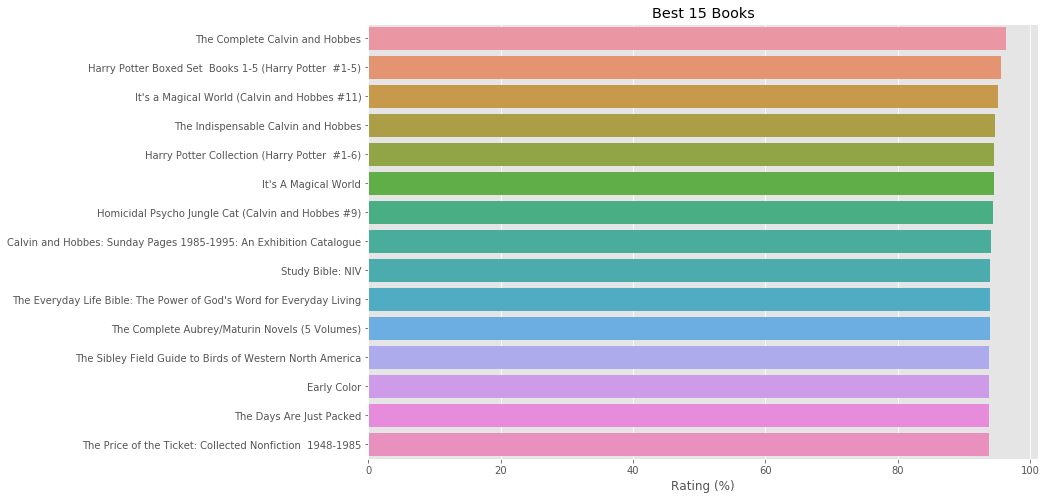

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='rating_percent', y='title', data=rating)
ax.set(ylabel='', xlabel='Rating (%)')
ax.set_title('Best 15 Books')

In [17]:
authors_vs_rating = data[['authors', 'rating_percent']]
authors_vs_rating

,authors,rating_percent
0,J.K. Rowling-Mary GrandPré,91.199958
1,J.K. Rowling-Mary GrandPré,89.799960
2,J.K. Rowling-Mary GrandPré,89.399986
3,J.K. Rowling,88.187813
4,J.K. Rowling-Mary GrandPré,90.999962
...,...,...
13709,Neil Gaiman-Teddy Kristiansen,76.395335
13710,Neil Gaiman-Dave McKean,74.394399
13711,Neil Gaiman-Michael Reaves,70.597126
13712,Brian Froud-Jessica Macbeth,88.550258


In [30]:
author_list = data['authors'].unique()
author_list

array(['J.K. Rowling-Mary GrandPré', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'Neil Gaiman-Michael Reaves',
       'Brian Froud-Jessica Macbeth', 'Brian Froud'], dtype=object)

In [39]:
counts = []
for author in author_list:
    num = len(data[data['authors'] == author])
    counts.append(num)

In [45]:
authors_vs_rating = authors_vs_rating.groupby('authors', sort=False).mean().reset_index()
authors_vs_rating.head()

,authors,rating_percent
0,J.K. Rowling-Mary GrandPré,90.905935
1,J.K. Rowling,88.758389
2,W. Frederick Zimmerman,71.420000
3,Douglas Adams,84.346172
4,Douglas Adams-Stephen Fry,84.343791


In [46]:
authors_vs_rating['count'] = counts
authors_vs_rating

,authors,rating_percent,count
0,J.K. Rowling-Mary GrandPré,90.905935,8
1,J.K. Rowling,88.758389,15
2,W. Frederick Zimmerman,71.420000,1
3,Douglas Adams,84.346172,18
4,Douglas Adams-Stephen Fry,84.343791,1
...,...,...,...
7595,Alisa Kwitney-Neil Gaiman,92.393363,1
7596,Neil Gaiman-Teddy Kristiansen,76.395335,1
7597,Neil Gaiman-Michael Reaves,70.597126,1
7598,Brian Froud-Jessica Macbeth,88.550258,1


In [52]:
def get_authors_rating(data):
    """
    Using Laplace's law of succession to return meaningful ratings based on average rating and ratings count
    """
    test = data['rating_percent'] / 100 * data['count']
    result = (test + 1) / (data['count'] + 2) * 100
    return result

In [57]:
authors_vs_rating['real_ratings'] = get_authors_rating(authors_vs_rating)
authors_vs_rating_copy = authors_vs_rating.sort_values(by='real_ratings', ascending=False)[:15]
authors_vs_rating_copy

,authors,rating_percent,count,real_ratings
4360,Bill Watterson,91.764264,16,87.123791
7,J.R.R. Tolkien,87.791024,31,85.500659
203,Hiromu Arakawa-Akira Watanabe,91.291924,12,85.393078
1,J.K. Rowling,88.758389,15,84.198579
0,J.K. Rowling-Mary GrandPré,90.905935,8,82.724748
678,Tite Kubo,86.273029,14,81.738901
2493,P.G. Wodehouse,82.693782,42,81.207701
3,Douglas Adams,84.346172,18,80.911555
2225,C.S. Lewis,83.572154,20,80.520140
5204,Shel Silverstein,84.643787,14,80.313314


Text(0.5, 1.0, 'Best 15 Authors')

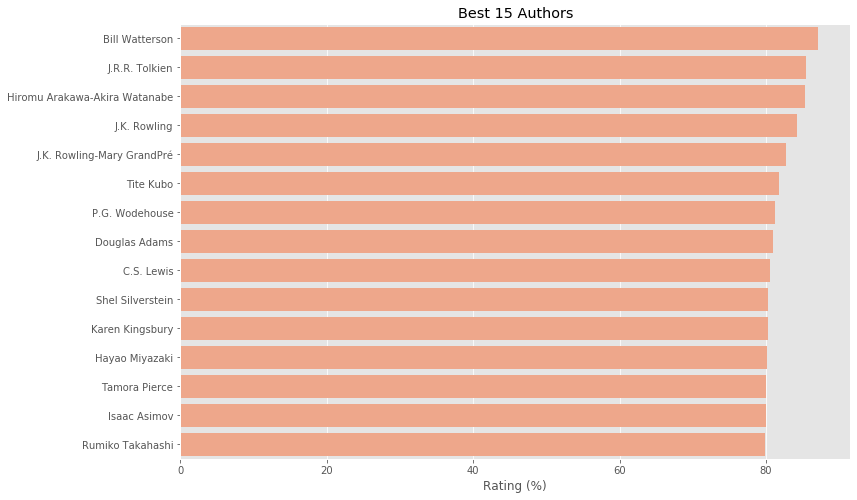

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='real_ratings', y='authors', data=authors_vs_rating_copy, color='lightsalmon')
ax.set(ylabel='', xlabel='Rating (%)')
ax.set_title('Best 15 Authors')

In [61]:
data['language_code'].value_counts()

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
rus          7
nl           7
swe          6
glg          4
tur          3
lat          3
cat          3
enm          3
ara          2
nor          1
srp          1
msa          1
dan          1
gla          1
ale          1
wel          1
heb          1
Name: language_code, dtype: int64